In [ ]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Loading data
**CIFAR10 dataset** contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


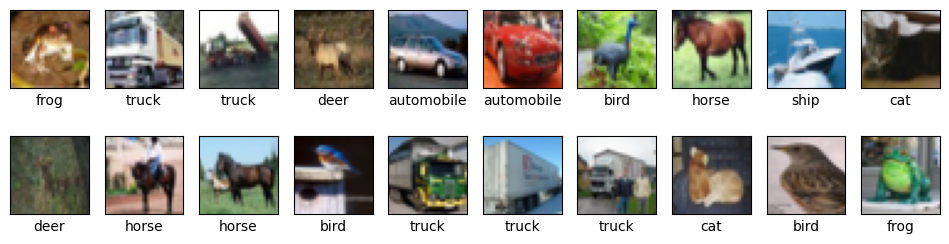

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,3))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    #which is why we need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Hyperparameter Tuning

In [ ]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 30.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully 

In [ ]:
from sklearn.model_selection import GridSearchCV
#from scikeras.wrappers import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier

**Dense Layers**

In [ ]:
def create_model2(layers):
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())

  model.add(Flatten())

  for i, nodes in enumerate(layers):
        model.add(Dense(nodes, activation='relu'))

  model.add(Dense(10, activation='softmax'))

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
model2 = KerasClassifier(build_fn=create_model2, verbose=1)

<ipython-input-34-12bf41dfdc8e>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=create_model2, verbose=1)


In [ ]:
# Tune dense layers
layers = [[64], [128],(256, 128),(512, 256, 128), (512, 256, 128, 64)]

grid_l = dict(layers=layers)
searcher_l = GridSearchCV(estimator=model2, cv=3, param_grid=grid_l, scoring="accuracy", verbose=1)

search_result_l = searcher_l.fit(train_images, train_labels, validation_data=(test_images, test_labels))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 14ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 9s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 9s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 16ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 9s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 9s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 11s 20ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 10s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 16ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 9s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 10s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 10s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 10s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 96s 60ms/step - loss: 1.3233 - accuracy: 0.5385 - val_loss: 1.1148 - val_accuracy: 0.6099


In [ ]:
print("Best: {0}, using {1}".format(search_result_l.best_score_, search_result_l.best_params_))

Best: 0.5488596024311363, using {'layers': [128]}


**Batch Size**

In [ ]:
def create_model3():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
# create model
model3 = KerasClassifier(build_fn=create_model3, verbose=1)

<ipython-input-38-ebaf341e2367>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model3 = KerasClassifier(build_fn=create_model3, verbose=1)


In [ ]:
# Tune batch size
batchSize = [16, 32, 64]

grid_b = dict(batch_size=batchSize)
searcher_b = GridSearchCV(estimator=model3, cv=3, param_grid=grid_b, verbose=1)

search_result_b = searcher_b.fit(train_images, train_labels, validation_data=(test_images, test_labels))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
3125/3125 [==============================] - 109s 34ms/step - loss: 1.3548 - accuracy: 0.5248 - val_loss: 1.3276 - val_accuracy: 0.5278


In [ ]:
print("Best: {0}, using {1}".format(search_result_b.best_score_, search_result_b.best_params_))

Best: 0.5443397959073385, using {'batch_size': 16}


**Dropout**

In [ ]:
def create_model4(dropout):
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
# create model
model4 = KerasClassifier(build_fn=create_model4, verbose=1)

<ipython-input-42-3bb456ce4e02>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model4 = KerasClassifier(build_fn=create_model4, verbose=1)


In [ ]:
# Tune dropout
dropout = [0.0, 0.1, 0.2]

grid_d = dict(dropout=dropout)
searcher_d = GridSearchCV(estimator=model4, cv=3, param_grid=grid_d, verbose=1)

search_result_d = searcher_d.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=16)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3125/3125 [==============================] - 109s 34ms/step - loss: 1.4318 - accuracy: 0.5023 - val_loss: 1.2710 - val_accuracy: 0.5606


In [ ]:
print("Best: {0}, using {1}".format(search_result_d.best_score_, search_result_d.best_params_))

Best: 0.5463793873786926, using {'dropout': 0.2}


**Optimizer**

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax

In [ ]:
def create_model5(optimizer):
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=optimizer, metrics=['accuracy'])
  return model

In [ ]:
# create model
model5 = KerasClassifier(build_fn=create_model5, verbose=1)

<ipython-input-52-24d42a9db33d>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model5 = KerasClassifier(build_fn=create_model5, verbose=1)


In [ ]:
# Tune optimizer
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']

grid_o = dict(optimizer=optimizer)
searcher_o = GridSearchCV(estimator=model5, cv=3, param_grid=grid_o, verbose=1)

search_result_o = searcher_o.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=16)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
3125/3125 [==============================] - 110s 34ms/step - loss: 1.3950 - accuracy: 0.5157 - val_loss: 1.4534 - val_accuracy: 0.5127


In [ ]:
print("Best: {0}, using {1}".format(search_result_o.best_score_, search_result_o.best_params_))

Best: 0.5432995160420736, using {'optimizer': 'Adam'}


In [ ]:
!pip install scikeras

**Learning Rate**

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
def create_model6():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
# create model
model6 = KerasClassifier(model=create_model6, verbose=1)

In [ ]:
# Tune learning rate
lr = [0.1, 0.01, 0.001, 0.0001]

grid_lr = dict(optimizer__learning_rate=lr)
searcher_lr = GridSearchCV(estimator=model6, cv=3, param_grid=grid_lr, verbose=1)

search_result_lr = searcher_lr.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=16)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 7s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 7s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 7s 14ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 14ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 9s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 7s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


521/521 [==============================] - 8s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3125/3125 [==============================] - 95s 30ms/step - loss: 1.4079 - accuracy: 0.5079 - val_loss: 1.2270 - val_accuracy: 0.5618


In [ ]:
print("Best: {0}, using {1}".format(search_result_lr.best_score_, search_result_lr.best_params_))

Best: 0.5463599416359207, using {'optimizer__learning_rate': 0.001}


**Train after hyperparameter tuning**

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor = 'val_loss', mode= 'min', patience = 10, verbose = 1, restore_best_weights = True)
history = model.fit(train_images, train_labels, epochs=50, callbacks = earlystop,
                    validation_data=(test_images, test_labels), batch_size=16)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3125/3125 [==============================] - 93s 29ms/step - loss: 1.4197 - accuracy: 0.5039 - val_loss: 1.2168 - val_accuracy: 0.5770
Epoch 2/50
3125/3125 [==============================] - 88s 28ms/step - loss: 1.0385 - accuracy: 0.6354 - val_loss: 1.2687 - val_accuracy: 0.6091
Epoch 3/50
3125/3125 [==============================] - 88s 28ms/step - loss: 0.8914 - accuracy: 0.6871 - val_loss: 0.8573 - val_accuracy: 0.7008
Epoch 4/50
3125/3125 [==============================] - 93s 30ms/step - loss: 0.7957 - accuracy: 0.7209 - val_loss: 1.0615 - val_accuracy: 0.6463
Epoch 5/50
3125/3125 [==============================] - 89s 28ms/step - loss: 0.7177 - accuracy: 0.7501 - val_loss: 0.8152 - val_accuracy: 0.7256
Epoch 6/50
3125/3125 [==============================] - 88s 28ms/step - loss: 0.6519 - accuracy: 0.7715 - val_loss: 0.9186 - val_accuracy: 0.6990
Epoch 7/50
3125/3125 [==============================] - 90s 29ms/step - loss: 0.6005 - accuracy: 0.7885 - val_loss: 0.8230 - val_accura

In [ ]:
# Evaluating the model

test_loss, test_acc = model.evaluate(test_images, test_labels) #batch size = 32
print('Test accuracy:', test_acc)

  5/313 [..............................] - ETA: 4s - loss: 0.7751 - accuracy: 0.7437  

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 [==============================] - 4s 13ms/step - loss: 0.8152 - accuracy: 0.7256
Test accuracy: 0.725600004196167


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

test_predicted = model.predict(test_images)
test_predicted_classes = np.argmax(test_predicted,axis = 1)

cm = confusion_matrix(y_true = test_labels, y_pred = test_predicted_classes)
print(cm)

313/313 [==============================] - 5s 16ms/step
[[725  18  61  16  28  10   7   6 103  26]
 [ 24 806   8   7   8   1   8   0  30 108]
 [ 64   4 624  38 136  45  40  22  20   7]
 [ 25   9  91 471 103 157  62  36  23  23]
 [ 10   5  63  38 746  24  27  59  19   9]
 [  6   4  83 125  52 618  32  61  12   7]
 [  2   3  56  32  73  19 789  11  12   3]
 [ 14   3  53  24  56  49   8 766  10  17]
 [ 40  19  17  14  10   1   6   1 872  20]
 [ 30  47   7   9   8   7   5   8  40 839]]


**Bayesian Optimization for CNN Feature Extraction**


In [ ]:
!pip install bayesian-optimization scikeras

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from bayes_opt import BayesianOptimization
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Model building function
def build_model(n_conv_layers, n_filters, kernel_size):
    n_conv_layers = int(round(n_conv_layers))
    n_filters = int(round(n_filters))
    kernel_size = int(round(kernel_size))

    model = models.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))

    for _ in range(n_conv_layers):
        model.add(layers.Conv2D(n_filters, (kernel_size, kernel_size), activation='relu', padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# Function for Bayesian Optimization
def cnn_evaluate(n_conv_layers, n_filters, kernel_size):
    model = build_model(n_conv_layers, n_filters, kernel_size)
    history = model.fit(x_train, y_train,
                        epochs=5,  # Lower for tuning speed; increase later
                        batch_size=64,
                        validation_split=0.2,
                        verbose=0)
    val_acc = np.max(history.history['val_accuracy'])
    return val_acc

# Define the bounds for Bayesian Optimization
pbounds = {
    'n_conv_layers': (1, 3),     # Try 1 to 3 conv layers
    'n_filters': (32, 128),      # Number of filters per layer
    'kernel_size': (3, 5),       # Filter size: 3x3 to 5x5
}

# Run Bayesian Optimization
optimizer = BayesianOptimization(
    f=cnn_evaluate,
    pbounds=pbounds,
    verbose=2,
    random_state=42,
)

optimizer.maximize(init_points=3, n_iter=7) # 3 random trials to start (exploration). Then 7 iterations where Bayesian Optimization picks promising hyperparameters using its surrogate model (exploitation). So, a total of 10 models will be trained and evaluated.

# Best result
print("Best Hyperparameters:")
print(optimizer.max)

|   iter    |  target   | n_conv... | n_filters | kernel... |
-------------------------------------------------------------
| 1         | 0.6590999 | 1.7490802 | 123.26857 | 4.4639878 |
| 2         | 0.6798999 | 2.1973169 | 46.977789 | 3.3119890 |
| 3         | 0.6184999 | 1.1161672 | 115.15290 | 4.2022300 |
| 4         | 0.6298999 | 1.3636499 | 80.308104 | 3.6839716 |
| 5         | 0.6453999 | 2.1942936 | 46.983548 | 3.2515089 |
| 6         | 0.6662999 | 2.0140174 | 35.532466 | 3.1080320 |
| 7         | 0.6904000 | 1.9100933 | 52.480728 | 3.4072426 |
| 8         | 0.6396999 | 2.3841932 | 68.519941 | 4.3682774 |
| 9         | 0.5971999 | 1.0794281 | 71.547437 | 4.6488695 |
| 10        | 0.6590999 | 2.0052964 | 120.15675 | 4.4533650 |
Best Hyperparameters:
{'target': np.float64(0.6904000043869019), 'params': {'n_conv_layers': np.float64(1.9100933409954048), 'n_filters': np.float64(52.480728959787285), 'kernel_size': np.float64(3.4072426273984853)}}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Best params from Bayesian Optimization
best_params = {
    'n_conv_layers': 1.91,
    'n_filters': 52.48,
    'kernel_size': 3.4
}

# Round and cast to proper types
n_conv_layers = int(round(best_params['n_conv_layers']))
n_filters = int(round(best_params['n_filters']))
kernel_size = int(round(best_params['kernel_size']))

# Final CNN model using best hyperparameters
def create_final_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))

    for _ in range(n_conv_layers):
        model.add(layers.Conv2D(n_filters, (kernel_size, kernel_size), activation='relu', padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))  # Optional dropout
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the final model with EarlyStopping
model = create_final_model()

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=2
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Epoch 1/50
625/625 - 9s - 14ms/step - accuracy: 0.4122 - loss: 1.6381 - val_accuracy: 0.5214 - val_loss: 1.3446
Epoch 2/50
625/625 - 4s - 6ms/step - accuracy: 0.5280 - loss: 1.3108 - val_accuracy: 0.4884 - val_loss: 1.4327
Epoch 3/50
625/625 - 4s - 6ms/step - accuracy: 0.5946 - loss: 1.1407 - val_accuracy: 0.6197 - val_loss: 1.1077
Epoch 4/50
625/625 - 5s - 9ms/step - accuracy: 0.6372 - loss: 1.0307 - val_accuracy: 0.6310 - val_loss: 1.0471
Epoch 5/50
625/625 - 5s - 8ms/step - accuracy: 0.6654 - loss: 0.9479 - val_accuracy: 0.6655 - val_loss: 0.9822
Epoch 6/50
625/625 - 4s - 6ms/step - accuracy: 0.6912 - loss: 0.8773 - val_accuracy: 0.6144 - val_loss: 1.1054
Epoch 7/50
625/625 - 4s - 6ms/step - accuracy: 0.7129 - loss: 0.8144 - val_accuracy: 0.6318 - val_loss: 1.0885
Epoch 8/50
625/625 - 3s - 5ms/step - accuracy: 0.7343 - loss: 0.7509 - val_accuracy: 0.7041 - val_loss: 0.8705
Epoch 9/50
625/625 - 3s - 6ms/step - accuracy: 0.7480 - loss: 0.7102 - val_accuracy: 0.5636 - val_loss: 1.3214


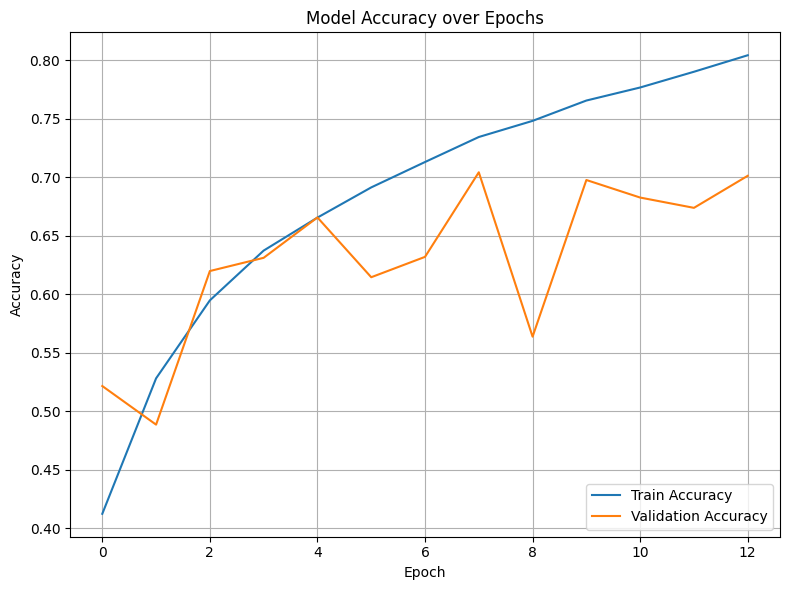

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


**Bayesian Optimization to tune all hyperparameters**

Step 1: Define Bayesian Optimization Code

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split train/validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Map integer to optimizer
optimizer_dict = {
    0: 'adam',
    1: 'rmsprop',
    2: 'sgd'
}

# Map integer to activation
activation_dict = {
    0: 'relu',
    1: 'tanh',
    2: 'elu'
}

# Build model function
def build_and_train_model(n_conv_layers, n_filters, kernel_size, batch_size,
                          optimizer, learning_rate, n_dense_layers, dense_units,
                          activation, dropout_rate):

    n_conv_layers = int(round(n_conv_layers))
    n_filters = int(round(n_filters))
    kernel_size = int(round(kernel_size))
    batch_size = int(round(batch_size))
    n_dense_layers = int(round(n_dense_layers))
    dense_units = int(round(dense_units))
    optimizer = optimizer_dict[int(round(optimizer))]
    activation = activation_dict[int(round(activation))]

    model = models.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))

    for _ in range(n_conv_layers):
        model.add(layers.Conv2D(n_filters, (kernel_size, kernel_size), activation=activation, padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    for _ in range(n_dense_layers):
        model.add(layers.Dense(dense_units, activation=activation))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(10, activation='softmax'))

    # Optimizer with learning rate
    if optimizer == 'adam':
        opt = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = optimizers.RMSprop(learning_rate=learning_rate)
    else:
        opt = optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
        verbose=0
    )

    val_acc = np.max(history.history['val_accuracy'])
    return val_acc


Step 2: Define Hyperparameter Space & Run Optimizer

In [ ]:
# Define bounds
pbounds = {
    'n_conv_layers': (1, 3),
    'n_filters': (32, 128),
    'kernel_size': (3, 5),
    'batch_size': (32, 128),
    'optimizer': (0, 2),  # 0=adam, 1=rmsprop, 2=sgd
    'learning_rate': (1e-4, 1e-2),
    'n_dense_layers': (1, 2),
    'dense_units': (64, 256),
    'activation': (0, 2),  # 0=relu, 1=tanh, 2=elu
    'dropout_rate': (0.2, 0.5),
}

optimizer = BayesianOptimization(
    f=build_and_train_model,
    pbounds=pbounds,
    verbose=2,
    random_state=42,
)

optimizer.maximize(
    init_points=5,
    n_iter=10,
)


|   iter    |  target   | n_conv... | n_filters | kernel... | batch_... | optimizer | learni... | n_dens... | dense_... | activa... | dropou... |
-------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.5011000 | 1.7490802 | 123.26857 | 4.4639878 | 89.471214 | 0.3120372 | 0.0016443 | 1.0580836 | 230.30581 | 1.2022300 | 0.4124217 |
| 2         | 0.4347000 | 1.0411689 | 125.11134 | 4.6648852 | 52.384554 | 0.3636499 | 0.0019157 | 1.3042422 | 164.75323 | 0.8638900 | 0.2873687 |
| 3         | 0.3483000 | 2.2237057 | 45.391410 | 3.5842892 | 67.170736 | 0.9121399 | 0.0078732 | 1.1996737 | 162.73301 | 1.1848291 | 0.2139351 |
| 4         | 0.5234000 | 2.2150897 | 48.370315 | 3.1301031 | 123.09301 | 1.9312640 | 0.0081031 | 1.3046137 | 82.753045 | 1.3684660 | 0.3320457 |
| 5         | 0.3835000 | 1.2440764 | 79.536983 | 3.0687770 | 119.29475 | 0.5175599 | 0.0066589 | 1.3117110 | 163.85306 | 1.

Step 3: Print Best Hyperparameters

In [ ]:
best_params = optimizer.max['params']

# Convert categorical integers to actual strings
best_params['optimizer'] = optimizer_dict[int(round(best_params['optimizer']))]
best_params['activation'] = activation_dict[int(round(best_params['activation']))]

# Round other values where appropriate
best_params['n_conv_layers'] = int(round(best_params['n_conv_layers']))
best_params['n_filters'] = int(round(best_params['n_filters']))
best_params['kernel_size'] = int(round(best_params['kernel_size']))
best_params['batch_size'] = int(round(best_params['batch_size']))
best_params['n_dense_layers'] = int(round(best_params['n_dense_layers']))
best_params['dense_units'] = int(round(best_params['dense_units']))

print("\nBest Hyperparameters Found:")
for key, value in best_params.items():
    print(f"{key}: {value}")


Best Hyperparameters Found:
n_conv_layers: 2
n_filters: 122
kernel_size: 5
batch_size: 92
optimizer: sgd
learning_rate: 0.0051423767982309585
n_dense_layers: 2
dense_units: 228
activation: elu
dropout_rate: 0.2834937542065845


Step 4: Train Final Model with Best Parameters

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Use the final best parameters
final_params = best_params  # From previous step

# Extract and convert
n_conv_layers = final_params['n_conv_layers']
n_filters = final_params['n_filters']
kernel_size = final_params['kernel_size']
batch_size = final_params['batch_size']
optimizer_name = final_params['optimizer']
learning_rate = final_params['learning_rate']
n_dense_layers = final_params['n_dense_layers']
dense_units = final_params['dense_units']
activation = final_params['activation']
dropout_rate = final_params['dropout_rate']

# Define optimizer with learning rate
if optimizer_name == 'adam':
    opt = optimizers.Adam(learning_rate=learning_rate)
elif optimizer_name == 'rmsprop':
    opt = optimizers.RMSprop(learning_rate=learning_rate)
else:
    opt = optimizers.SGD(learning_rate=learning_rate)

# Build final model
def create_final_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))

    for _ in range(n_conv_layers):
        model.add(layers.Conv2D(n_filters, (kernel_size, kernel_size), activation=activation, padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    for _ in range(n_dense_layers):
        model.add(layers.Dense(dense_units, activation=activation))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_final_model()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_cnn_model.keras', save_best_only=True, monitor='val_loss')

# Train model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    callbacks=[early_stop, model_checkpoint],
    verbose=2
)

Epoch 1/50
435/435 - 16s - 37ms/step - accuracy: 0.3825 - loss: 1.7988 - val_accuracy: 0.3426 - val_loss: 1.9263
Epoch 2/50
435/435 - 13s - 29ms/step - accuracy: 0.4858 - loss: 1.4533 - val_accuracy: 0.5407 - val_loss: 1.2790
Epoch 3/50
435/435 - 7s - 17ms/step - accuracy: 0.5361 - loss: 1.3140 - val_accuracy: 0.5599 - val_loss: 1.2496
Epoch 4/50
435/435 - 10s - 23ms/step - accuracy: 0.5746 - loss: 1.2078 - val_accuracy: 0.5433 - val_loss: 1.3179
Epoch 5/50
435/435 - 7s - 17ms/step - accuracy: 0.6024 - loss: 1.1234 - val_accuracy: 0.5885 - val_loss: 1.1951
Epoch 6/50
435/435 - 10s - 24ms/step - accuracy: 0.6286 - loss: 1.0494 - val_accuracy: 0.6351 - val_loss: 1.0596
Epoch 7/50
435/435 - 10s - 23ms/step - accuracy: 0.6480 - loss: 0.9931 - val_accuracy: 0.5148 - val_loss: 1.5027
Epoch 8/50
435/435 - 11s - 24ms/step - accuracy: 0.6660 - loss: 0.9485 - val_accuracy: 0.6638 - val_loss: 0.9483
Epoch 9/50
435/435 - 10s - 23ms/step - accuracy: 0.6798 - loss: 0.9035 - val_accuracy: 0.5632 - va

Step 5: Save and Load the Model

In [ ]:
# Save final model (already saved best during training)
model.save("final_cnn_model.keras")

# To load later:
# from tensorflow.keras.models import load_model
# model = load_model("final_cnn_model.keras")

Step 6: Plot Accuracy Curves

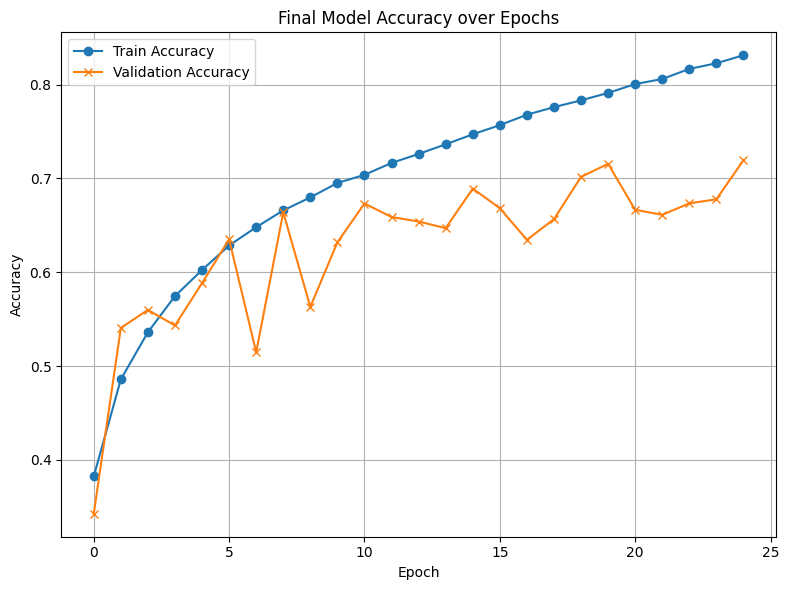

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Final Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()